<a href="https://colab.research.google.com/github/ajaymathew522/Stock-Market-Analysis-/blob/master/LSTM_using_1min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from fastai.tabular import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Reliance_1Minute.csv to Reliance_1Minute.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Reliance_1Minute.csv']))

In [ ]:
df.head()

,Unnamed: 0,time,open,high,low,close,volume,oi
0,0,2020-04-16T09:15:00+0530,1146.60,1168.50,1146.60,1167.45,7762,0
1,1,2020-04-16T09:16:00+0530,1166.65,1173.85,1166.65,1172.10,4387,0
2,2,2020-04-16T09:17:00+0530,1171.85,1171.85,1167.80,1169.95,5186,0
3,3,2020-04-16T09:18:00+0530,1169.95,1169.95,1162.45,1165.00,3111,0
4,4,2020-04-16T09:19:00+0530,1165.00,1167.10,1162.80,1165.25,4655,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15375 non-null  int64  
 1   time        15375 non-null  object 
 2   open        15375 non-null  float64
 3   high        15375 non-null  float64
 4   low         15375 non-null  float64
 5   close       15375 non-null  float64
 6   volume      15375 non-null  int64  
 7   oi          15375 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 961.1+ KB


In [ ]:
df['time'] = pd.to_datetime(df.time,format="%Y-%m-%dT%H:%M:%S%z" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15375 entries, 0 to 15374
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype                                
---  ------      --------------  -----                                
 0   Unnamed: 0  15375 non-null  int64                                
 1   time        15375 non-null  datetime64[ns, pytz.FixedOffset(330)]
 2   open        15375 non-null  float64                              
 3   high        15375 non-null  float64                              
 4   low         15375 non-null  float64                              
 5   close       15375 non-null  float64                              
 6   volume      15375 non-null  int64                                
 7   oi          15375 non-null  int64                                
dtypes: datetime64[ns, pytz.FixedOffset(330)](1), float64(4), int64(3)
memory usage: 961.1 KB


In [ ]:
df.index = df['time']

In [ ]:
data = df.sort_index(ascending=True, axis=0)

In [ ]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['time', 'close'])

In [ ]:
for i in range(0,len(data)):
    new_data['time'][i] = data['time'][i]
    new_data['close'][i] = data['close'][i]


In [ ]:
new_data.index = new_data.time
new_data.drop('time', axis=1, inplace=True)


In [ ]:
dataset = new_data.values

In [ ]:
dataset.shape

(15375, 1)

In [ ]:

train = dataset[0:10761,:]
valid = dataset[10761:,:]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=20, batch_size=128, verbose=2)

Epoch 1/20
 - 15s - loss: 0.0199
Epoch 2/20
 - 15s - loss: 1.6451e-04
Epoch 3/20
 - 15s - loss: 1.3281e-04
Epoch 4/20
 - 15s - loss: 1.2422e-04
Epoch 5/20
 - 15s - loss: 1.2067e-04
Epoch 6/20
 - 15s - loss: 1.1842e-04
Epoch 7/20
 - 15s - loss: 1.1744e-04
Epoch 8/20
 - 15s - loss: 1.1592e-04
Epoch 9/20
 - 15s - loss: 1.1343e-04
Epoch 10/20
 - 15s - loss: 1.1085e-04
Epoch 11/20
 - 15s - loss: 1.1063e-04
Epoch 12/20
 - 15s - loss: 1.1115e-04
Epoch 13/20
 - 15s - loss: 1.0848e-04
Epoch 14/20
 - 15s - loss: 1.0422e-04
Epoch 15/20
 - 15s - loss: 1.0158e-04
Epoch 16/20
 - 15s - loss: 1.0159e-04
Epoch 17/20
 - 15s - loss: 9.7001e-05
Epoch 18/20
 - 15s - loss: 9.4360e-05
Epoch 19/20
 - 15s - loss: 9.3155e-05
Epoch 20/20
 - 15s - loss: 9.1183e-05


In [ ]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

close          3.779636
Predictions    1.269928
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


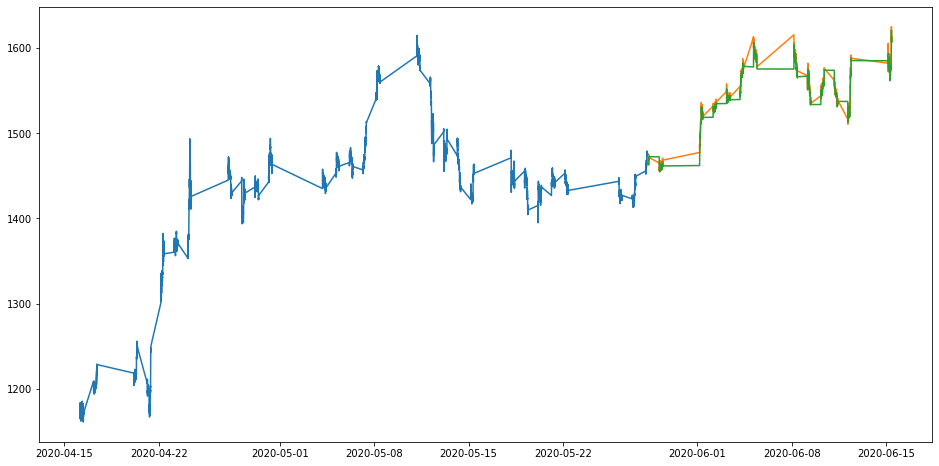

In [ ]:
train = new_data[:10761]
valid = new_data[10761:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [ ]:
print(valid)

                             close  Predictions
time                                           
2020-05-28 13:36:00+05:30   1471.1  1471.976440
2020-05-28 13:37:00+05:30  1472.35  1471.971558
2020-05-28 13:38:00+05:30   1472.4  1471.937256
2020-05-28 13:39:00+05:30   1471.8  1471.880859
2020-05-28 13:40:00+05:30  1470.35  1471.775146
...                            ...          ...
2020-06-15 15:25:00+05:30  1610.85  1607.934692
2020-06-15 15:26:00+05:30  1610.05  1608.103271
2020-06-15 15:27:00+05:30  1610.55  1608.134155
2020-06-15 15:28:00+05:30     1612  1608.106934
2020-06-15 15:29:00+05:30   1611.4  1608.130737

[4614 rows x 2 columns]


In [ ]:
valid.to_csv("predictions.csv")